# Categorización productos en Supermercado

En un supermercado de la ciudad se tiene una base de datos de productos con su nombre y marca. El dueño del Supermercado decide clasificarlos en categorías para asi poder hacer una mejor gestión de su negocio tanto para almacenamiento como para pedidos a proveedores.

El señor empieza a clasificarlos uno a uno, pero se da cuneta que esta tarea le tomara meses realizarla, por eso decide apoyarse de algoritmos de Segmentación para completar esta tarea

## Importar librerías

In [149]:
import pandas as pd
import seaborn as sns
import nltk
from nltk import word_tokenize, download
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import numpy as np

In [150]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/santiago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiago/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Lectura de datos

In [151]:
data_train = pd.read_csv('train_challenge.csv')

In [152]:
data_train.head(2)

,name,description,maker,trademark
0,Cerveza Otro Mundo 500 Ml,Cerveza Otro Mundo 500 Ml,NaN,Otro Mundo
1,Vino San Telmo Varietales X750Ml.,Vino San Telmo Varietales X750Ml.,NaN,San Telmo


In [153]:
# Revisar tipos de datos y non-null columns

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         10000 non-null  object
 1   description  10000 non-null  object
 2   maker        3418 non-null   object
 3   trademark    9965 non-null   object
dtypes: object(4)
memory usage: 312.6+ KB


## Preprocesamiento

In [154]:
# Revisar que tan iguales son la columna name y description

print("El {} %  de los registros entre name y description son iguales" \
      .format(sum(data_train['name'] == data_train['description'])*100/len(data_train)))

El 90.22 %  de los registros entre name y description son iguales


In [155]:
# Lenar los 35 valores faltantes de la columna trademark con una variable dummy

data_train['trademark'] = data_train['trademark'].fillna('N/A')

In [156]:
# Eliminar stop words de una lista

def remove_stopwords(words):
    """Eliminar stop words de una lista tokenizada de palabras"""
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

In [157]:
# Eliminar los guiones que los utilizan como separador de palabras. Puntos, guiones y comas que no son decimales

def remove_punctuation(words):
    """Eliminar los guiones que los utilizan como separador de palabras. Puntos, guiones y comas que no son decimales"""
    new_words = []
    for word in words:
        new_word = word.lower() # Eliminar mayusculas
        new_word = re.sub(r"([a-z])\-([a-z])", r"\1 \2", new_word)  # Eliminar los guiones que los utilizan como separador de palabras
        new_word = re.sub(r"([a-z]|)([0-9]|[0-9][0-9]|[0-9][0-9][0-9]|[0-9][0-9][0-9][0-9])([a-z])", r"\1 \2 \3", new_word) # Separar los numeros de letras (150gr) --> (150 gr)
        if ((new_word != '') & (new_word != ',') & (new_word != '.') & (new_word != '-')):  # Eliminar puntos y comas que no son decimales
            new_words.append(new_word)
    return new_words

In [158]:
# Transformar la palabra a su raiz

from nltk.stem import SnowballStemmer

def stem_words(words):
    """Transformar la palabra a su raiz de una lista tokenizada de palabras"""
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [159]:
def normalize(words):
    words = word_tokenize(words)
    words = remove_punctuation(words)
    words = ' '.join(words)

    words = word_tokenize(words)
  
    words = remove_stopwords(words)
    #words = stem_words(words)
    words = ' '.join(words)
    return words

In [160]:
# Aplicar las transformaciones a la columna 'name'

data_train['name'] = data_train['name'].apply(normalize)

In [161]:
# Crear una columna con la descripcion y marca

data_train['name + trade_mark'] = data_train['name'] + ' ' + data_train['trademark']

In [162]:
# Eliminar duplicados

data_train.drop_duplicates('name + trade_mark', inplace=True)

In [163]:
data_train.head(10)

,name,description,maker,trademark,name + trade_mark
0,cerveza mundo 500 ml,Cerveza Otro Mundo 500 Ml,NaN,Otro Mundo,cerveza mundo 500 ml Otro Mundo
1,vino san telmo varietales x 750 ml,Vino San Telmo Varietales X750Ml.,NaN,San Telmo,vino san telmo varietales x 750 ml San Telmo
2,mayonesa natura 1000 cc,Mayonesa Natura con jugo de limon sachet x 100...,gallega,Natura,mayonesa natura 1000 cc Natura
3,brahma chopp 354 cc x 6,Brahma Chopp 354cc x 6,NaN,Brahma,brahma chopp 354 cc x 6 Brahma
4,mayonesa hellmanns light doypack 237 gr,Mayonesa HellmannS Light Doypack 237 Gr,NaN,Hellmann´S,mayonesa hellmanns light doypack 237 gr Hellma...
5,vino cardos sauv blanco,VINO BLANCO LOS CARDOS SAUVIGNON 750 CC,NaN,LOS CARDOS,vino cardos sauv blanco LOS CARDOS
6,postre georgalos nucrem chocolatados 170 gr,Postre Georgalos Nucrem Chocolatados 170 Gr,NaN,Georgalos,postre georgalos nucrem chocolatados 170 gr Ge...
7,salchichón piccolo calchaqui morrones 240 g,Salchichón Piccolo Calchaqui Con Morrones 240 g,La Piamontesa\t,Calchaqui,salchichón piccolo calchaqui morrones 240 g Ca...
8,galletitas obleas rhodesia agrupado 22 gr x 4 u,Galletitas Obleas Rhodesia Agrupado 22 Gr X 4 U,NaN,Rhodesia,galletitas obleas rhodesia agrupado 22 gr x 4 ...
9,aceite oliva natura extra virgen clásico 500 ml,Aceite De Oliva Natura Extra Virgen Clásico 50...,NaN,Natura,aceite oliva natura extra virgen clásico 500 m...


In [164]:
len(data_train)

6170

# Vectorización

## Tfidf

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
data_tfidf = data_train.copy()    

In [167]:
corpus = data_tfidf['name']
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus,)
print(vectorizer.get_feature_names())
print(X_tfidf.shape)


['000', '10', '100', '1000', '101', '105', '110', '1100', '1125', '113', '115', '116', '118', '12', '120', '125', '126', '127', '128', '13', '130', '1300', '135', '136', '14', '140', '141', '143', '144', '145', '148', '15', '150', '1500', '155', '157', '158', '16', '160', '162', '163', '164', '165', '166', '1664', '167', '170', '171', '173', '175', '177', '18', '180', '185', '187', '1887', '1890', '1895', '19', '190', '1906', '195', '198', '1ª', '20', '200', '2005', '2007', '2009', '2010', '2012', '2013', '2015', '204', '205', '21', '210', '215', '216', '217', '22', '220', '224', '225', '226', '227', '228', '23', '230', '232', '235', '237', '238', '24', '240', '242', '25', '250', '255', '258', '26', '264', '269', '27', '270', '275', '276', '28', '280', '283', '284', '285', '29', '290', '2ª', '30', '300', '305', '31', '310', '315', '320', '326', '33', '330', '332', '335', '336', '33º', '34', '340', '346', '35', '350', '354', '355', '36', '360', '368', '369', '37', '370', '375', '38', '3

<Figure size 1440x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, '50 PALABRAS CON MAS PESO')

<BarContainer object of 50 artists>

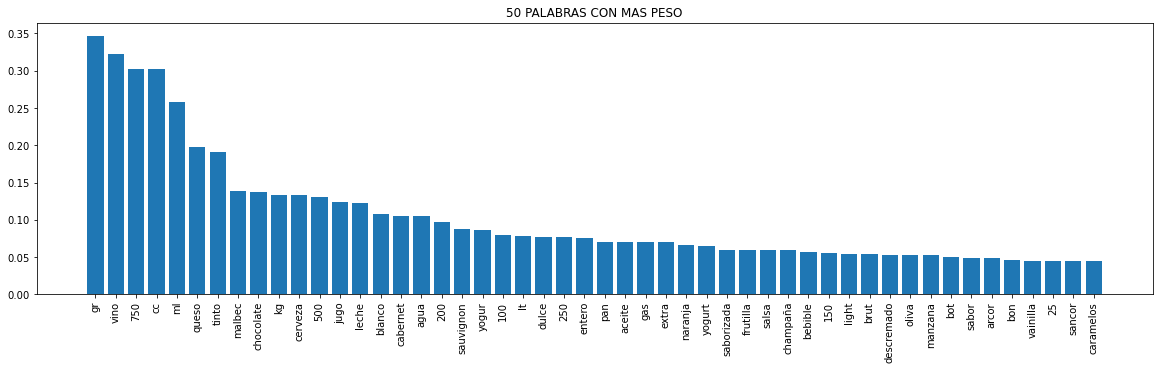

In [168]:
feature_importances = vectorizer.transform([" ".join(corpus.to_list())])
max_indices = feature_importances.toarray()[0].argsort()[-50:][::-1]
max_words = [(vectorizer.get_feature_names()[i],feature_importances.toarray()[0][i]) for i in max_indices]

plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')
plt.title("50 PALABRAS CON MAS PESO")
plt.bar(*zip(*max_words))

# Clustering

## K means

In [169]:
from sklearn.cluster import KMeans
import numpy as np

In [170]:
X_tfidf

<6170x3029 sparse matrix of type '<class 'numpy.float64'>'
	with 34401 stored elements in Compressed Sparse Row format>

KMeans(n_clusters=5)

KMeans(n_clusters=10)

KMeans(n_clusters=15)

KMeans(n_clusters=20)

KMeans(n_clusters=25)

KMeans(n_clusters=30)

KMeans(n_clusters=35)

KMeans(n_clusters=45)

KMeans(n_clusters=50)

KMeans(n_clusters=55)

KMeans(n_clusters=60)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

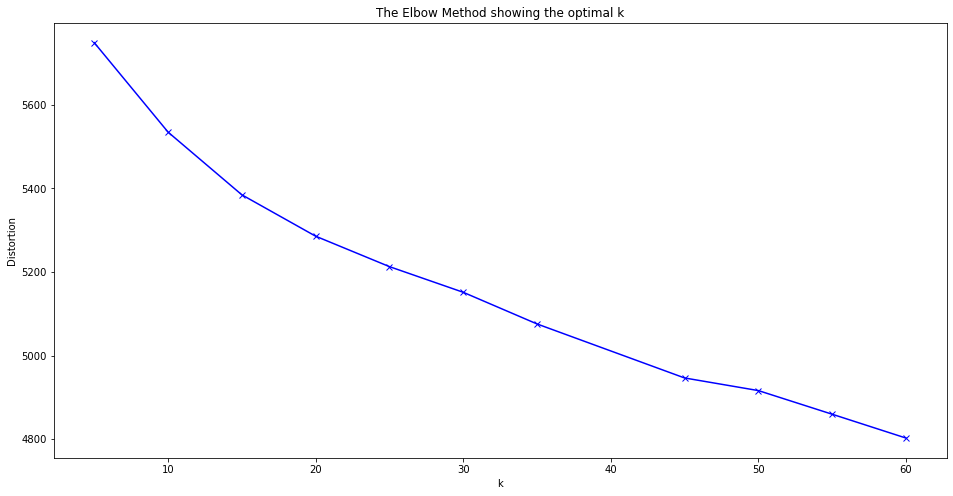

In [171]:
# Eligiendo el numero de clusters
distortions = []
K = (5,10,15,20,25,30,35,45,50,55,60)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_tfidf)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

###  Using tfidf vectorization

In [172]:
kmeans = KMeans(n_clusters=30, random_state=10).fit(X_tfidf)
kmeans.labels_


array([19,  2,  0, ...,  4, 23,  4], dtype=int32)

In [173]:
data_tfidf['cluster'] = kmeans.labels_

In [174]:
data_tfidf.head(2)

,name,description,maker,trademark,name + trade_mark,cluster
0,cerveza mundo 500 ml,Cerveza Otro Mundo 500 Ml,NaN,Otro Mundo,cerveza mundo 500 ml Otro Mundo,19
1,vino san telmo varietales x 750 ml,Vino San Telmo Varietales X750Ml.,NaN,San Telmo,vino san telmo varietales x 750 ml San Telmo,2


## Análisis descriptivo y corrección de clusters

Filtrar cada uno de los clusters para darse cuenta que tipo de productos quedaron en cada uno de los grupos

In [175]:
#data_tfidf[data_tfidf['cluster']==10][:60]

In [176]:
categorias = {0: 'Yogures',
              1: 'Vinos',
              2: 'Indeterminado',
              3: 'Golosinas y Chocolates',
              4: 'Jugos',
              5: 'Indeterminado',
              6: 'Aderezos',
              7: 'Aguas',
              8: 'Cervezas',
              9: 'Indeterminado',
              10: 'Quesos',
              11: 'Champagnes',
              12: 'Indeterminado',
              13: 'Aguas',
              14: 'Vinos',
              15: 'Aderezos',
              16: 'Champagnes',
              17: 'Cervezas',
              18: 'Aceites y Vinagres',
              19: 'Leches',
              20: 'Vinos',
              21: 'Indeterminado',
              22: 'Cervezas',
              23: 'Golosinas y Chocolates',
              24: 'Fiambre',
              25: 'Vinos',
              26: 'Aderezos',
              27: 'Golosinas y Chocolates',
              28: 'Quesos',
              29: 'Aderezos'}

 Anotaciones 



*   Se realizó el modelo utilizando la "trade mark" pero resulto un mejor performance solo con la descripcion" 
*   index 6679 Vino clasificado como Chapagne
*   Cluster #3 tiene 3 alfajores clasificados como leche
*   Cluster #7 tiene 1 limonada clasificada como agua
*   Clustrer #14 tiene 2 Champagne clasificadas como vino
*   Cluster #19 tiene 3 quesos clasificados como leche
*   Cluster #20 tiene 1 baguet clasificado como vino
*   Cluster #23 tiene 2 leches achocolatadas como Golosinas y chocolates
*   Cluster #25 tiene 11 vinos espumantes como vinos
*   Cluster #28 3 items mal clasificados
*   Cluster #29 tiene 1 queso calsificado como aderezo



In [177]:
data_tfidf['categoría'] = data_tfidf['cluster'].map(categorias)

In [178]:
# Arreglar anotaciones

In [179]:
# Cluster #3

data_tfidf.loc[[257,2210,2954],'categoría'] = 'Leches'

In [180]:
# Cluster #7 
display(data_tfidf[((data_tfidf['cluster']==7) & (data_tfidf['name'].str.startswith('limonada')))])
data_tfidf.loc[[7880],'categoría'] = 'Jugos'

,name,description,maker,trademark,name + trade_mark,cluster,categoría


In [181]:
# Cluster #14
temp = data_tfidf[((data_tfidf['cluster']==14) & ((data_tfidf['name'].str.contains('espum')|(data_tfidf['name'].str.contains('champa')))))]
display(temp)
data_tfidf.loc[temp.index, 'categoría'] = 'Champagnes'
del temp

,name,description,maker,trademark,name + trade_mark,cluster,categoría


In [182]:
# Cluster #19

temp = data_tfidf[((data_tfidf['cluster']==19) & ((data_tfidf['name'].str.contains('ricota'))))]
data_tfidf.loc[temp.index, 'categoría'] = 'Quesos'
display(temp)
del temp

,name,description,maker,trademark,name + trade_mark,cluster,categoría
6472,ricota entera serenísima 500 gr,Ricota Entera La Serenísima 500 Gr,NaN,La Serenisima,ricota entera serenísima 500 gr La Serenisima,19,Leches
6993,ricota descremada serenísima 500 gr,Ricota Descremada La Serenísima 500 Gr,NaN,La Serenisima,ricota descremada serenísima 500 gr La Serenisima,19,Leches


In [183]:
# Cluster #20 

temp = data_tfidf[((data_tfidf['cluster']==20) & ((data_tfidf['name'].str.contains('baguet'))))]
data_tfidf.loc[temp.index, 'categoría'] = 'Panificados'
display(temp)
del temp


,name,description,maker,trademark,name + trade_mark,cluster,categoría


In [184]:
# Cluster #23 

temp = data_tfidf[((data_tfidf['cluster']==23) & ((data_tfidf['name'].str.contains('tost'))))]
data_tfidf.loc[temp.index, 'categoría'] = 'Panificados'
display(temp)
del temp

,name,description,maker,trademark,name + trade_mark,cluster,categoría


In [185]:
# Cluster #25 

temp = data_tfidf[((data_tfidf['cluster']==25) & ((data_tfidf['name'].str.contains('espum')|(data_tfidf['name'].str.contains('champa')))))]
display(temp.head(2))
data_tfidf.loc[temp.index, 'categoría'] = 'Champagnes'
del temp

,name,description,maker,trademark,name + trade_mark,cluster,categoría


In [186]:
#  Cluster #28 

data_tfidf.loc[[2369, 239, 6434, 4615], 'categoría'] = 'Indeterminado'

In [187]:
# Cluster #29 

temp = data_tfidf[((data_tfidf['cluster']==29) & ((data_tfidf['name'].str.contains('ques'))))]
display(temp)
data_tfidf.loc[temp.index, 'categoría'] = 'Quesos'
del temp

,name,description,maker,trademark,name + trade_mark,cluster,categoría


In [188]:
# Arreglar panes

temp = data_tfidf[data_tfidf['name'].str.startswith('pan ')]
display(temp.head(2))
data_tfidf.loc[temp.index, 'categoría'] = 'Panificados'
del temp

,name,description,maker,trademark,name + trade_mark,cluster,categoría
187,pan jumbo multicereal 540 gr,Pan Jumbo Multicereal 540 Gr,NaN,Jumbo Mp,pan jumbo multicereal 540 gr Jumbo Mp,11,Champagnes
217,pan dulce arcor frutas x 500 gr,Pan Dulce Arcor Con Frutas X 500 Gr,NaN,Arcor,pan dulce arcor frutas x 500 gr Arcor,27,Golosinas y Chocolates


In [189]:
# Crear categoria whiskies

temp = data_tfidf[data_tfidf['name'].str.contains('whisk')]
display(temp.head(2))
data_tfidf.loc[temp.index, 'categoría'] = 'Whiskies'
del temp

,name,description,maker,trademark,name + trade_mark,cluster,categoría
70,whisky blenders pride 1 l,Whisky Blenders Pride 1 L,Pernod Ricard Argentina,Blenders Pride,whisky blenders pride 1 l Blenders Pride,4,Jugos
196,whisky jim beam honey 750 ml,Whisky Jim Beam Honey 750 Ml,NaN,Jim Beam,whisky jim beam honey 750 ml Jim Beam,4,Jugos


In [190]:
# Crear categoria salchichas

temp = data_tfidf[data_tfidf['name'].str.contains('salchich') | data_tfidf['name'].str.contains('mortadela')]
display(temp.head(2))
data_tfidf.loc[temp.index, 'categoría'] = 'Salchichas'
del temp

,name,description,maker,trademark,name + trade_mark,cluster,categoría
7,salchichón piccolo calchaqui morrones 240 g,Salchichón Piccolo Calchaqui Con Morrones 240 g,La Piamontesa\t,Calchaqui,salchichón piccolo calchaqui morrones 240 g Ca...,4,Jugos
26,mortadela tripack kg mínimo 800 gr mayorista,Mortadela Tripack Por Kg Mínimo 800 Gr Mayorista,NaN,Sin Marca,mortadela tripack kg mínimo 800 gr mayorista S...,3,Golosinas y Chocolates


In [191]:
data_tfidf['categoría'].value_counts(normalize)

Jugos                     0.153485
Indeterminado             0.140681
Golosinas y Chocolates    0.131118
Aderezos                  0.121880
Cervezas                  0.096759
Vinos                     0.078282
Quesos                    0.061912
Aguas                     0.052188
Yogures                   0.032091
Fiambre                   0.026580
Panificados               0.025446
Leches                    0.024959
Aceites y Vinagres        0.014749
Salchichas                0.013614
Whiskies                  0.013290
Champagnes                0.012966
Name: categoría, dtype: float64

### Kmeans metric

In [192]:
from sklearn.metrics import silhouette_score

In [193]:
silhouette_score(X_tfidf,kmeans.labels_)

0.04541353332372114

# Algoritmos de clasificación

Después de tenes los categorías definidas ya podemos realizar un algoritmo de clasificación que clasifique productos en las categorías previamente definidas

### k neighborhoods

In [194]:
data_tfidf.head()

,name,description,maker,trademark,name + trade_mark,cluster,categoría
0,cerveza mundo 500 ml,Cerveza Otro Mundo 500 Ml,NaN,Otro Mundo,cerveza mundo 500 ml Otro Mundo,19,Leches
1,vino san telmo varietales x 750 ml,Vino San Telmo Varietales X750Ml.,NaN,San Telmo,vino san telmo varietales x 750 ml San Telmo,2,Indeterminado
2,mayonesa natura 1000 cc,Mayonesa Natura con jugo de limon sachet x 100...,gallega,Natura,mayonesa natura 1000 cc Natura,0,Yogures
3,brahma chopp 354 cc x 6,Brahma Chopp 354cc x 6,NaN,Brahma,brahma chopp 354 cc x 6 Brahma,4,Jugos
4,mayonesa hellmanns light doypack 237 gr,Mayonesa HellmannS Light Doypack 237 Gr,NaN,Hellmann´S,mayonesa hellmanns light doypack 237 gr Hellma...,0,Yogures


In [195]:
data_neigh = data_tfidf[data_tfidf['categoría'] != 'Indeterminado']

In [196]:
y = data_neigh['categoría']
X = vectorizer.transform(data_neigh['name'])

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [200]:
neigh.score(X_test,y_test)

0.8539114043355325

### SVM

In [201]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [202]:
clf.score(X_test,y_test)

0.9688972667295005

In [203]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5)

array([0.9736098 , 0.97737983, 0.96981132, 0.97264151, 0.96415094])

In [204]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01,0.1,1, 10,100]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

In [205]:
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')})

0.9811498586239397

## Ensamble methods

### Boosting

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
clf_boost = GradientBoostingClassifier(n_estimators=100, random_state=0)
clf_boost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [207]:
clf_boost.score(X_test, y_test)

0.9736098020735156

In [208]:
cross_val_score(clf_boost, X, y, cv=5)

array([0.9736098 , 0.97643732, 0.97358491, 0.96698113, 0.96698113])

### Random forest

In [209]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=300)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [210]:
clf_forest.score(X_test,y_test)

0.9849198868991518

In [211]:
cross_val_score(clf_forest, X, y, cv=5)

array([0.97832234, 0.9868049 , 0.97169811, 0.97169811, 0.97924528])

# Clasificar archivo de test

In [212]:
data_test = pd.read_csv('test_challenge.csv')

In [213]:
data_test['categoria'] = clf.predict(vectorizer.transform(data_test['name']))

In [214]:
# Evaluar cualitativamente (a ojo) como fue el rendimiento del clasificador por cada etiqueta
data_test[180:240]

,name,description,maker,trademark,categoria
180,Seremix Licuado Durazno 250 Ml,Seremix Licuado Durazno 250 Ml,NaN,La Serenisima,Aderezos
181,Champaa Chandon Extra Brut,Champaa Chandon Extra Brut 187 Cc - 4 U,Moet Chandon,Moet Chandon,Quesos
182,Vino Santa Ana Abocado 750 Cc,Vino Santa Ana Abocado 750 Cc,NaN,Santa Ana,Vinos
183,Huevo De Pascua Bon O Bon Chocolate Blanco Paq...,Huevo De Pascua Bon O Bon Chocolate Blanco Paq...,NaN,Bon O Bon,Aderezos
184,Vino Tinto Chapa Uno Roble Cabarnet Sauvignon ...,Vino Tinto Chapa Uno Roble Cabarnet Sauvignon ...,NaN,Chapa Uno,Vinos
185,Vino Tinto La Vuelta Malbec 750 Cc,Vino Tinto La Vuelta Malbec 750 Cc,NaN,La Vuelta,Golosinas y Chocolates
186,Salsa Mangos Chutney Darma 250 Gr,Salsa Mangos Chutney Darma 250 Gr,NaN,Darama,Yogures
187,Aceto Balsamico Casalta Glaze Frutos Rojos 250 Ml,Aceto Balsamico Casalta Glaze Frutos Rojos 250 Ml,NaN,Casalta,Aderezos
188,Vino Tinto La Posta Glorieta 750 mL,Vino Tinto La Posta Glorieta 750 mL,La Posta Glorieta,La Posta Glorieta,Vinos
189,Huevo Kinder Pascuas Star Wars X100G-Paq-Gr.-100,Huevo Kinder Pascuas Star Wars X100G-Paq-Gr.-100,NaN,Kinder,Aderezos
